In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.feature_selection
import tensorflow as tf
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_FraudDetection_JAR2020.csv")
df.head(10)

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
5,1990,1034,NaN,0,148.396,24.301,328.495,111.015,8.478,153.262,...,0.688689,0.040056,0.092675,0.003067,1,0.389406,0.851688,0.191741,0.105527,-0.034367
6,1990,1036,NaN,0,637.880,199.012,1011.901,324.132,113.271,1185.288,...,0.754448,-0.033881,-0.372440,-0.040405,1,1.379084,0.955720,-0.038167,0.055174,-0.042160
7,1990,1043,NaN,0,396.594,92.140,677.736,183.566,50.125,596.137,...,0.819713,0.047023,-0.061932,-0.108796,1,1.847471,0.964188,-0.192385,-0.031264,-0.041039
8,1990,1045,NaN,0,2657.800,966.300,13353.600,3727.400,949.300,10908.200,...,0.243882,0.117693,-0.369057,-0.047424,1,1.236793,0.996031,0.181389,0.022773,-0.038199
9,1990,1050,NaN,0,0.004,0.000,0.126,-0.778,0.000,0.000,...,0.809524,NaN,NaN,-1.520085,1,-0.156728,NaN,-22.174603,-7.016393,0.118902


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

   fyear  gvkey  p_aaer  misstate     act     ap       at     ceq    che  \
0   1990   1009     NaN         0  10.047  3.736   32.335   6.262  0.002   
1   1990   1011     NaN         0   1.247  0.803    7.784   0.667  0.171   
2   1990   1017     NaN         0  55.040  3.601  118.120  44.393  3.132   
3   1990   1021     NaN         0  24.684  3.948   34.591   7.751  0.411   
4   1990   1028     NaN         0  17.325  3.520   27.542 -12.142  1.017   

      cogs  ...  soft_assets     ch_cs     ch_cm    ch_roa  issue        bm  \
0   30.633  ...     0.312448  0.095082  0.082631 -0.019761      1  0.413170   
1    1.125  ...     0.315904  0.188832 -0.211389 -0.117832      1  0.157887   
2  107.343  ...     0.605342  0.097551 -0.105780  0.091206      1  2.231337   
3   31.214  ...     0.793068 -0.005725 -0.249704  0.017545      1  1.043582   
4   32.662  ...     0.869182 -0.231536 -1.674893 -0.466667      0 -1.602508   

        dpi      reoa      EBIT    ch_fcf  
0  0.873555  0.167620  0

In [ ]:
# Get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

In [ ]:
# Basic statistical details
print(df.describe())

               fyear          gvkey       p_aaer       misstate  \
count  146045.000000  146045.000000   964.000000  146045.000000   
mean     2002.011702   54243.435516  2503.840249       0.006601   
std         6.959894   59937.455765   912.093250       0.080976   
min      1990.000000    1004.000000   371.000000       0.000000   
25%      1996.000000   10658.000000  1803.000000       0.000000   
50%      2002.000000   25088.000000  2620.500000       0.000000   
75%      2008.000000   66586.000000  3180.000000       0.000000   
max      2014.000000  317264.000000  3996.000000       1.000000   

                 act             ap             at            ceq  \
count  146045.000000  146045.000000  146045.000000  146045.000000   
mean      737.847759     181.993488    2374.041576     887.126243   
std      3744.542368    1047.546104   11957.736980    5056.948150   
min        -0.254000       0.000000       0.000000  -25560.000000   
25%         8.277000       1.151000      18.281000 

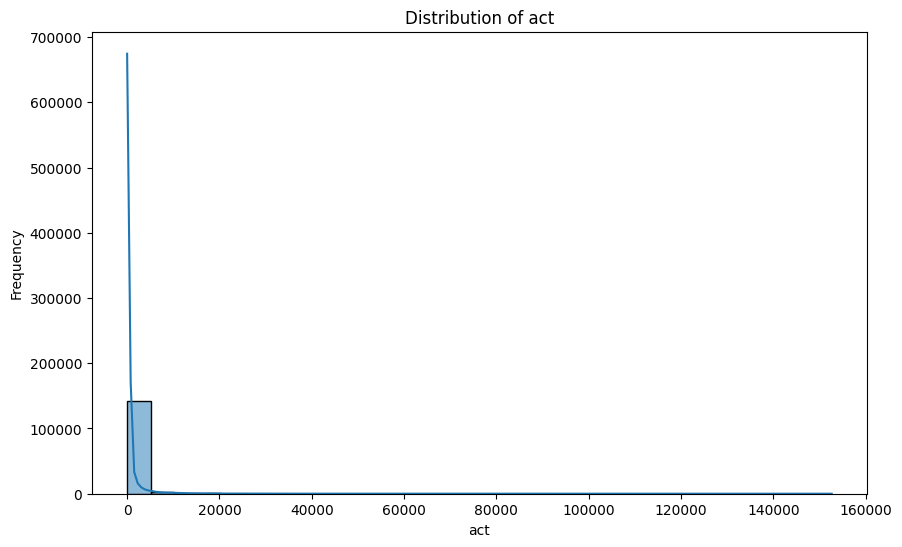

In [ ]:
# Univariate Analysis
# Histogram of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='act', bins=30, kde=True)
plt.title('Distribution of act')
plt.xlabel('act')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Print column names in df_imputed
print(df_imputed.columns)

Index(['fyear', 'gvkey', 'p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype='object')


In [ ]:
# Assuming df is your DataFrame
# Step 1: Handling Missing Values
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
# Step 2: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filled.select_dtypes(include=["float64"]))


In [ ]:
# Step 3: Creating Interaction Terms
interaction_terms = PolynomialFeatures(degree=2, interaction_only=True)
interaction_features = interaction_terms.fit_transform(df_filled.select_dtypes(include=['float64']))



In [ ]:
# Step 4: Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_features = pca.fit_transform(scaled_features)

In [ ]:
# Assuming 'misstate' is the target column
target_column = 'misstate'  # Update this line with the correct target column name
X_train, X_test, y_train, y_test = train_test_split(pca_features, df_imputed[target_column], test_size=0.2, random_state=42)


In [ ]:
# Identify the correct target column name
target_column = 'misstate'  # Replace this with your actual target column name if different

# Step 2: Check for NaNs and infinite values
print("Checking for NaNs and infinite values...")
print(df.isna().sum())  # Count of NaNs per column
print(np.isfinite(df).sum().sum())  # Count of finite values overall

# Step 3: Handle NaNs and infinite values
# Option 1: Fill NaNs with the mean of the column
df.fillna(df.mean(), inplace=True)

# Option 2: Remove rows with NaNs (uncomment if you prefer this approach)
# df.dropna(inplace=True)

# Ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

Checking for NaNs and infinite values...
fyear               0
gvkey               0
p_aaer         145081
misstate            0
act                 0
ap                  0
at                  0
ceq                 0
che                 0
cogs                0
csho                0
dlc                 0
dltis               0
dltt                0
dp                  0
ib                  0
invt                0
ivao                0
ivst                0
lct                 0
lt                  0
ni                  0
ppegt               0
pstk                0
re                  0
rect                0
sale                0
sstk                0
txp                 0
txt                 0
xint                0
prcc_f              0
dch_wc           4759
ch_rsst          4851
dch_rec          4743
dch_inv          4615
soft_assets       592
ch_cs           15918
ch_cm           17107
ch_roa          12678
issue               0
bm                 18
dpi              9228
reoa         

In [ ]:
# Prepare data for modeling
X = df.drop(target_column, axis=1).values
y = df[target_column].values

In [ ]:
# Step 4: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = dict(enumerate(class_weights))




In [ ]:
# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Reshape X_train, X_val to 3D (adding channel dimension)
X_resampled = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
# Fit the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_resampled, y_resampled, epochs=8, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=[early_stopping])



In [ ]:
# Evaluate the model
val_predict = (model.predict(X_val) > 0.5).astype("int32")
val_precision = precision_score(y_val, val_predict)
val_recall = recall_score(y_val, val_predict)
val_f1 = f1_score(y_val, val_predict)

print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
print(f'Validation F1 Score: {val_f1}')